We want to minimize the following expectation
$$\underset{\phi}{\min} \mathbb{E}_{q_\phi (x)}[f(x)]$$
We need to compute the gradient w.r.t. $\phi$. We apply the likelihood ratio trick:

\begin{eqnarray}
\nabla_\phi \mathbb{E}_{q_\phi (x)}[f(x)] & = & \nabla_\phi \sum_x q_\phi (x) f(x) \\
& = & \sum_x \nabla_\phi q_\phi (x) f(x) \\
& = & \sum_x q_\phi (x) \frac{\nabla_\phi q_\phi (x)}{q_\phi (x)} f(x)\\
& = & \mathbb{E}_{q_\phi (x)} \nabla_\phi \log q_\phi(x) f(x) \\
& = & \frac{1}{K} \sum_{i = 1}^K \nabla_\phi \log q_\phi (x^{(i)}) f(x^{(i)})
\end{eqnarray}
where $x^{(i)} \sim q_\phi (x)$.

This Likelihood Ratio Gradient has high variance, especially in higher dimensional spaces.
An example in 2D:

Minimize the following loss function:

\begin{eqnarray}
\mathcal{L} = \mathbb{E}_{\mathcal{N}(\mu, I)} \left[\left\lvert\left\lvert x - \left[ \begin{matrix} 5 \\ 5 \end{matrix} \right] \right\rvert\right\rvert_2^2 \right]
\end{eqnarray}


Apply the formula

\begin{eqnarray}
\nabla_\mu \mathcal{L} & = & \mathbb{E}\left[\nabla_\mu \log \left(\exp\left(-\frac{1}{2} (x - \mu)^\top I (x-\mu) \right)\right) f(x)\right] \\
& = & \mathbb{E} \left[\left\lvert\left\lvert x - \left[
\begin{matrix} 5 \\ 5 \end{matrix}
\right] \right\rvert\right\rvert_2^2 \nabla_\mu -\frac{1}{2} (x - \mu)^\top (x-\mu)  \right] \\
& = & \mathbb{E} \left[  \left\lvert\left\lvert x - \left[ \begin{matrix} 5 \\ 5 \end{matrix} \right] \right\rvert\right\rvert_2^2 (x - \mu) \right]
\end{eqnarray}


In [31]:
import numpy as np
from matplotlib import pyplot as plt

mu = np.array([0, 0])
target = np.array([5, 5])
I = np.array([[1, 0], [0, 1]])
n=40

x = np.random.multivariate_normal(mean=mu, cov=I, size=(n,))

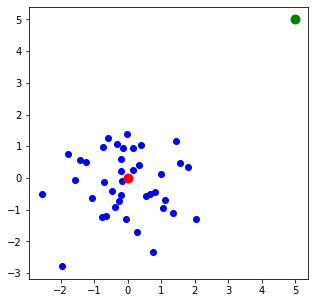

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(x[:, 0], x[:, 1], c='b')

ax.scatter(mu[0], mu[1], c='r', s=80)
ax.scatter(target[0], target[1], c='g', s=80)

In [33]:
def loss(z, target):
    return (np.linalg.norm(z - target, axis=1) ** 2).mean()

def lrg(z, mu, target):
    norm = np.linalg.norm(z - target, axis=1) ** 2
    # print('norm', norm)
    # print('z - mu', z - mu)
    grad = (norm[:, np.newaxis] * (z - mu)).mean(axis=0)

    # print('grad', grad)

    return grad

def train(mu, target, loss, lr, n_train, n_test, n_iter=10, viz=False):
    for it in range(n_iter):
        z = np.random.multivariate_normal(mean=mu, cov=I, size=n_train)
        lrgi = lrg(z, mu, target)
        mu = mu - lr * lrgi

        # visualization
        if viz:
            fig, ax = plt.subplots(1, 1, figsize=(5, 5))
            ax.set_xlim(-5, 6)
            ax.set_ylim(-5, 6)
            ax.scatter(z[:, 0], z[:, 1], c='b')

            ax.scatter(mu[0], mu[1], c='r', s=80)
            ax.scatter(target[0], target[1], c='g', s=80)

        z_test = np.random.multivariate_normal(mean=mu, cov=I, size=n_test)
        lossi = loss(z_test, target)
        print(it, lossi)

When `n_train = 1`, the training is very unstable. It diverges when `lr = 0.1` and converges slowly when `lr = 0.01`.

Unstable------------
0 103.01282360152194
1 627.404226948955
2 1361.1288338334914
3 40751.66833781327
4 7506739.032696059
5 818109848145.6456
6 1.6058886232470091e+22
7 5.673652777073676e+42
8 5.673652777073676e+42
9 5.673652777073676e+42
10 5.673652777073676e+42
11 5.673652777073676e+42
12 5.673652777073676e+42
13 5.673652777073676e+42
14 5.673652777073676e+42
15 5.673652777073676e+42
16 5.673652777073676e+42
17 5.673652777073676e+42
18 5.673652777073676e+42
19 5.673652777073676e+42
20 5.673652777073676e+42
21 5.673652777073676e+42
22 5.673652777073676e+42
23 5.673652777073676e+42
24 5.673652777073676e+42
25 5.673652777073676e+42
26 5.673652777073676e+42
27 5.673652777073676e+42
28 5.673652777073676e+42
29 5.673652777073676e+42
30 5.673652777073676e+42
31 5.673652777073676e+42
32 5.673652777073676e+42
33 5.673652777073676e+42
34 5.673652777073676e+42
35 5.673652777073676e+42
36 5.673652777073676e+42
37 5.673652777073676e+42
38 5.673652777073676e+42
39 5.673652777073676e+42
40 5.673652

<ipython-input-33-247436d360eb>:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=(5, 5))


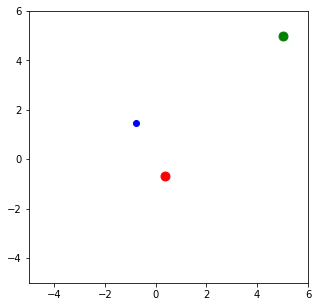

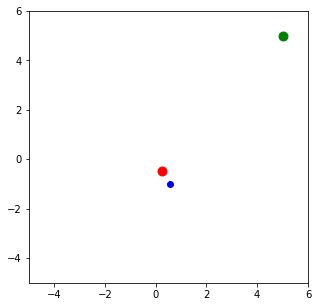

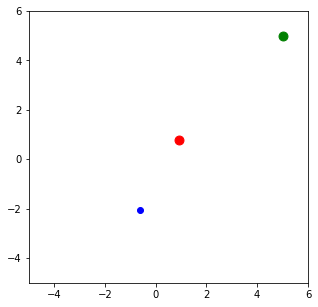

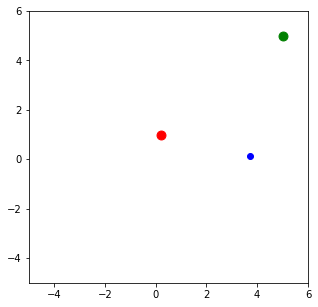

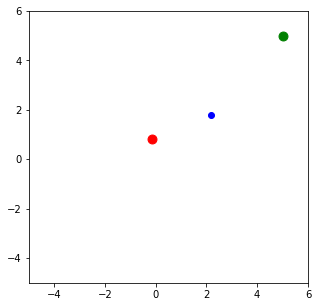

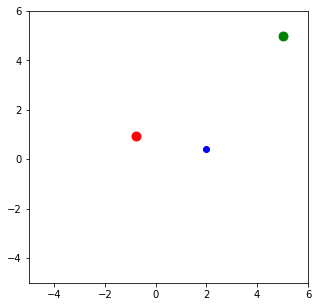

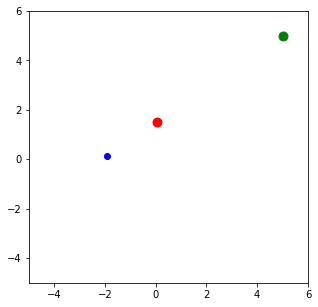

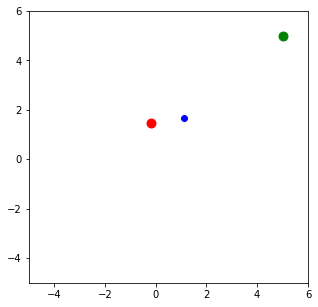

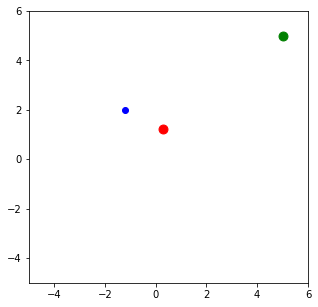

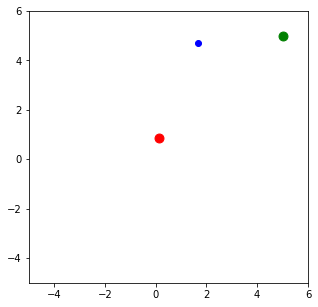

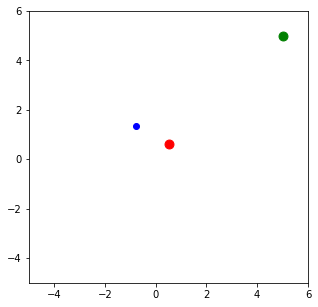

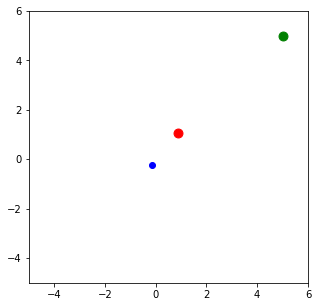

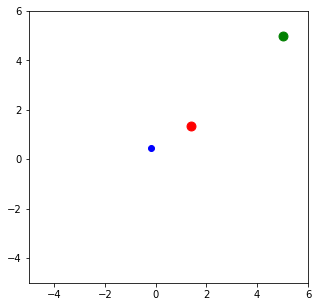

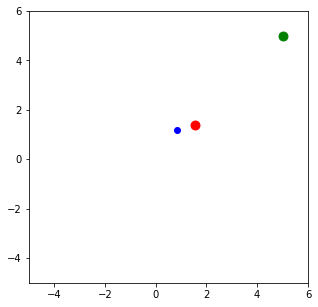

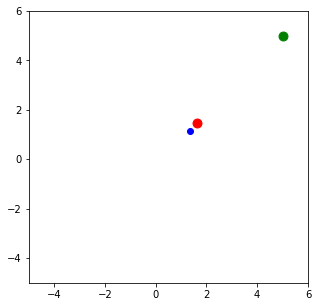

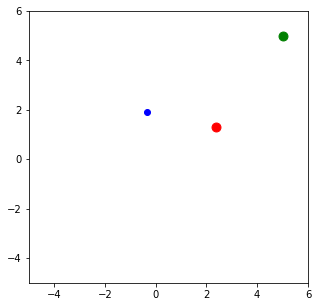

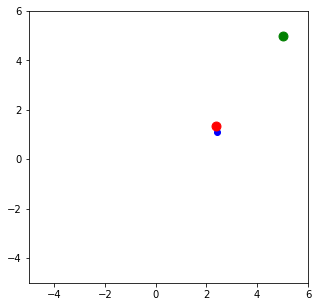

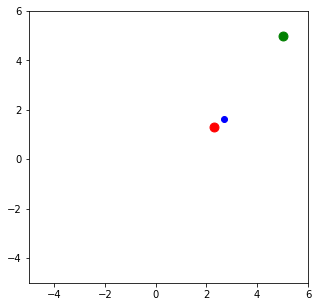

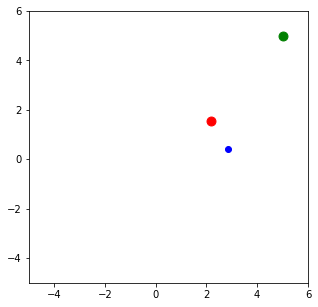

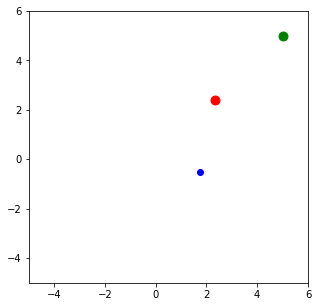

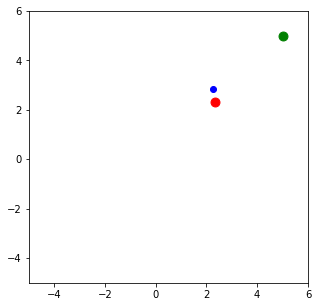

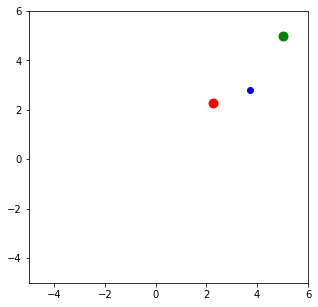

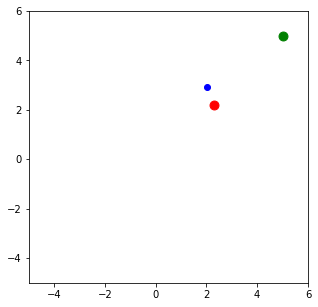

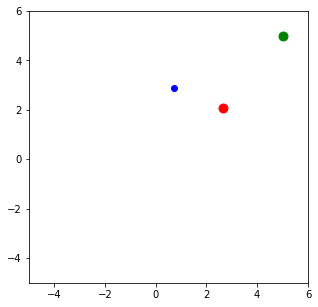

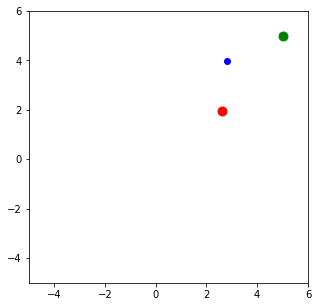

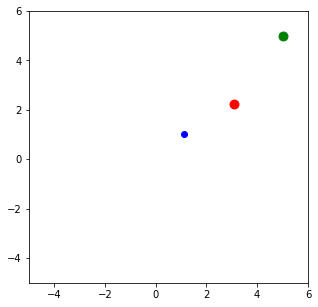

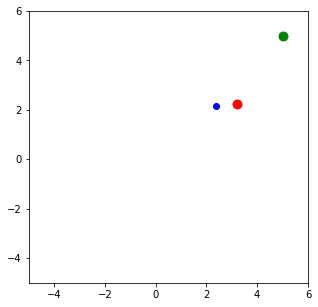

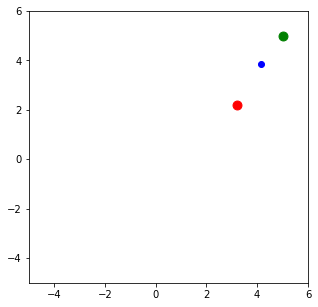

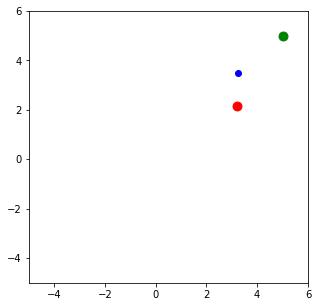

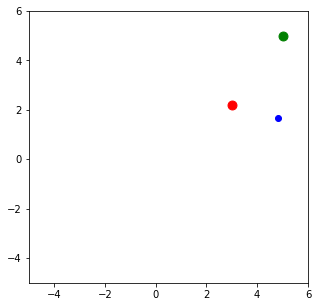

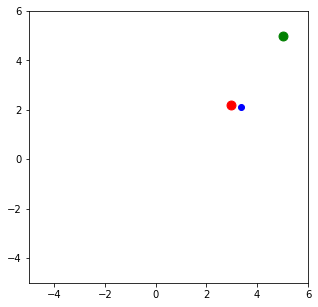

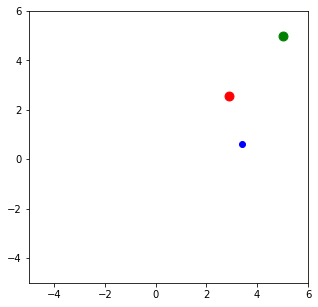

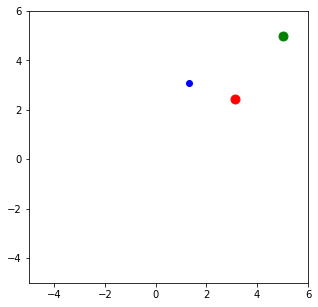

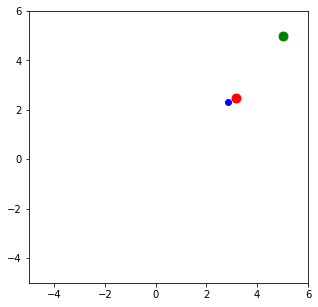

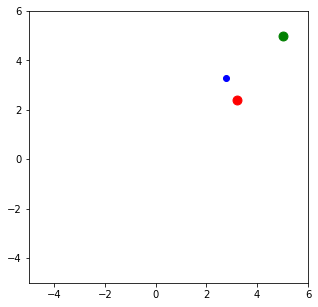

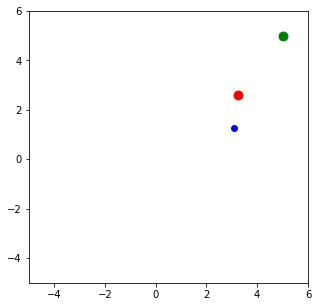

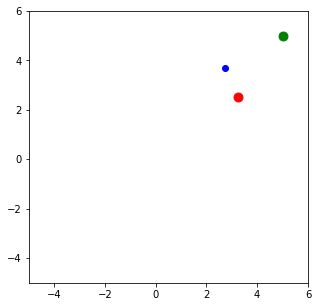

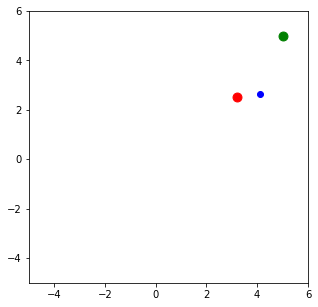

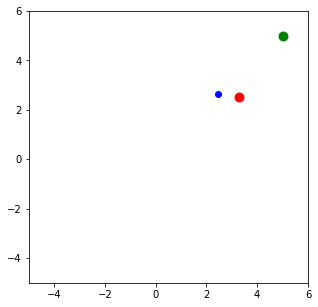

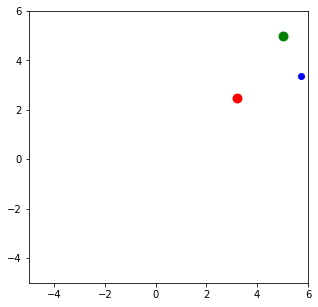

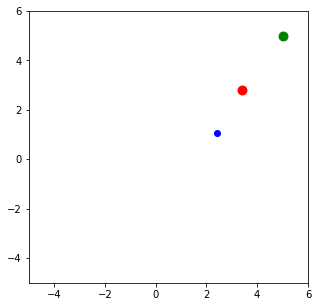

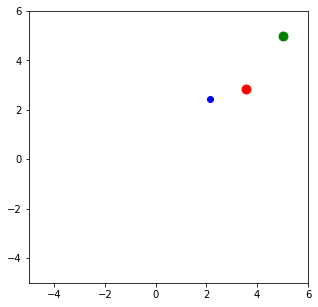

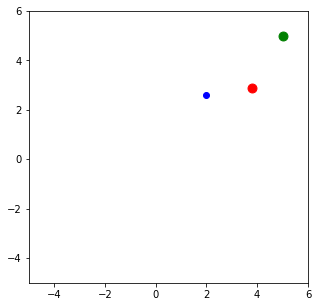

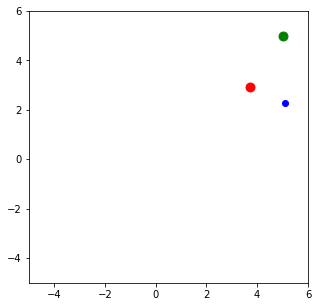

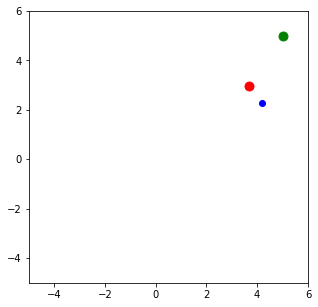

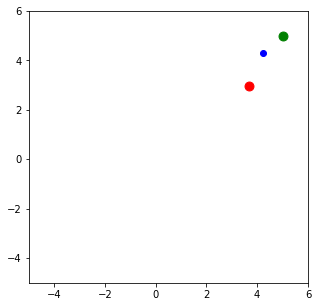

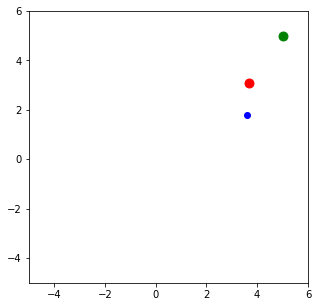

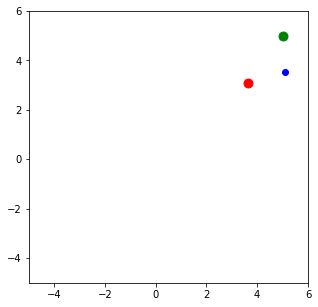

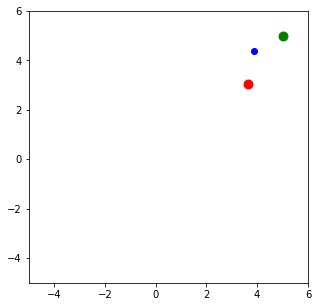

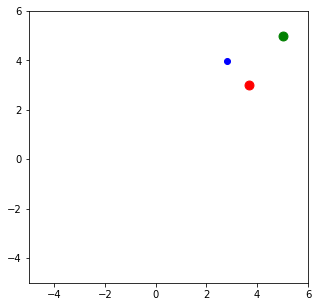

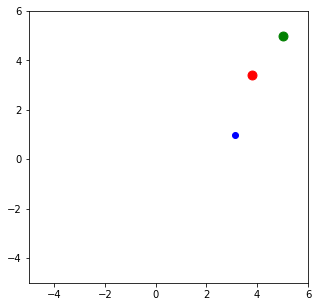

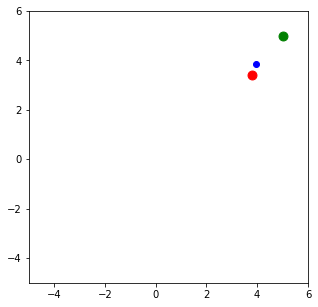

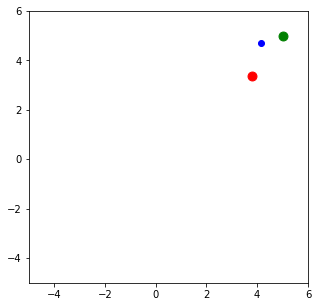

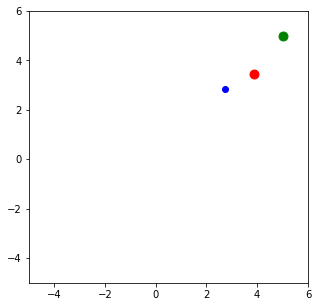

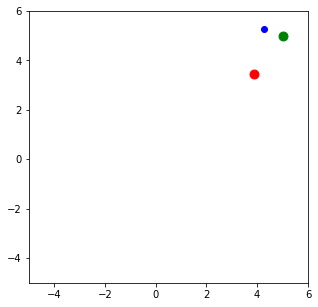

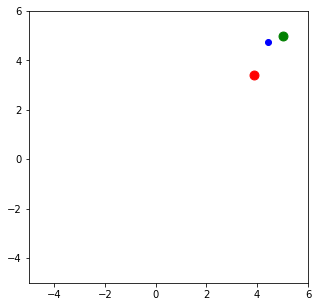

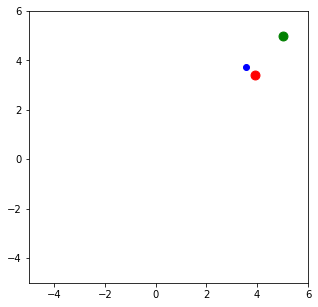

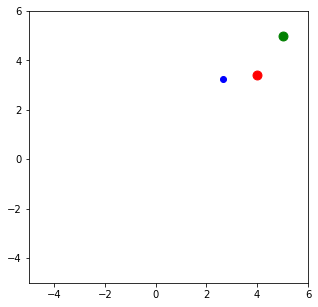

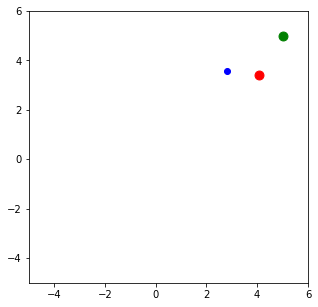

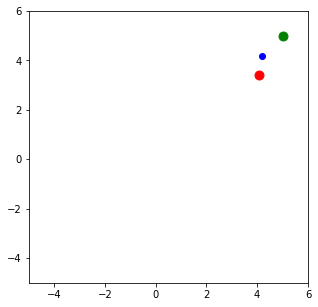

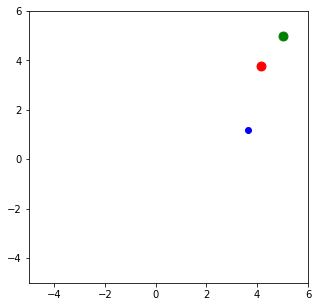

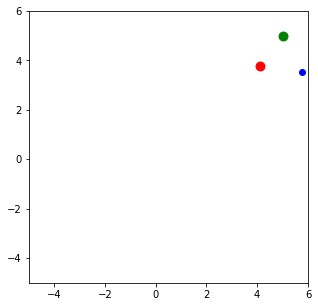

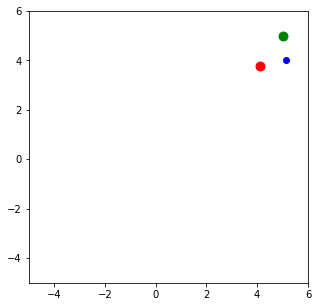

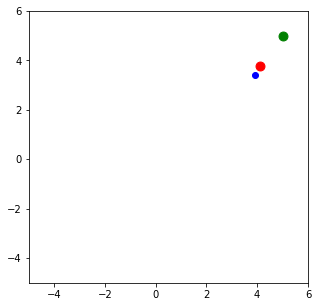

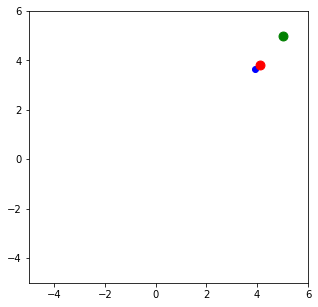

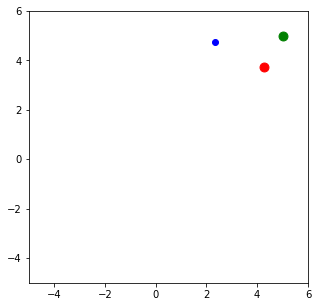

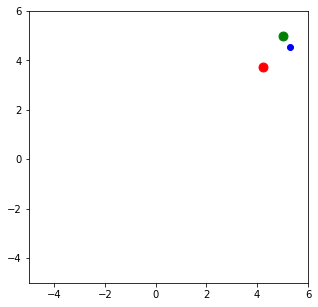

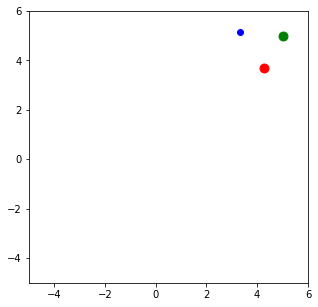

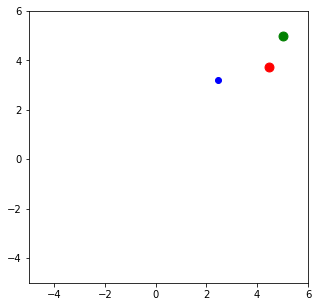

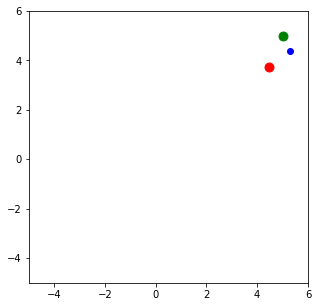

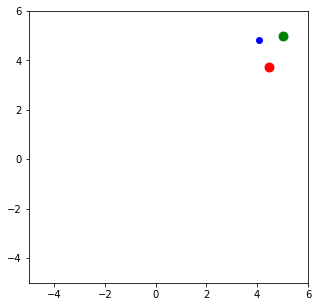

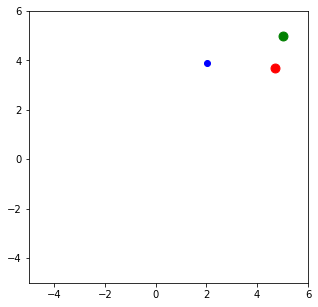

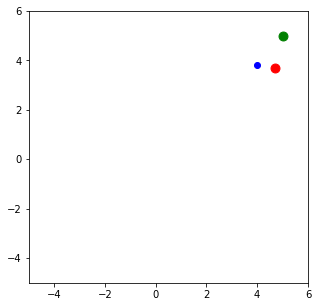

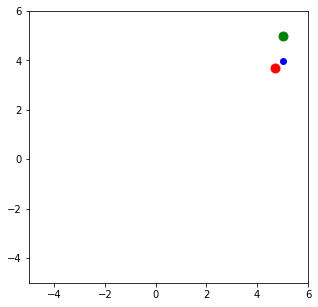

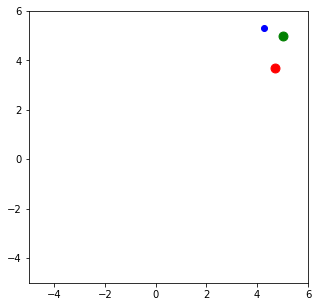

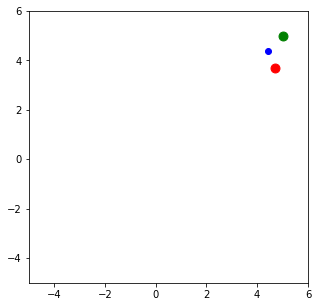

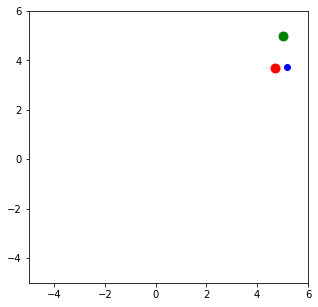

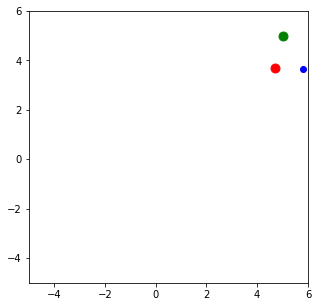

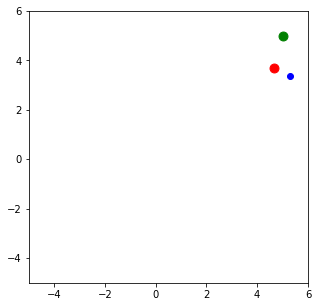

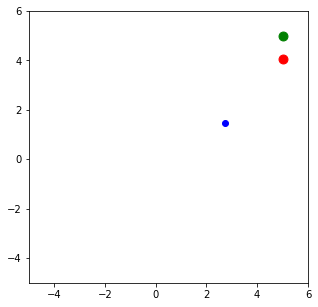

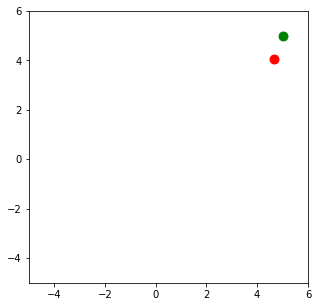

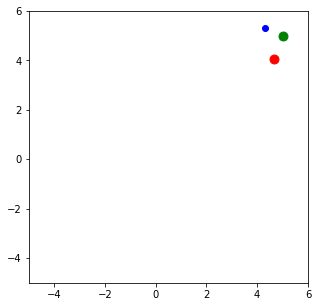

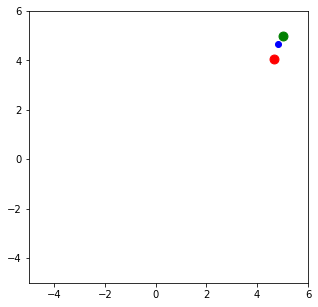

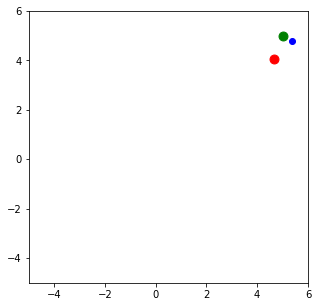

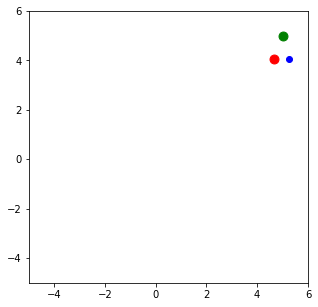

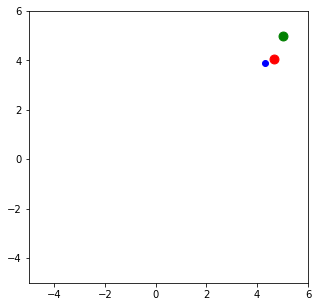

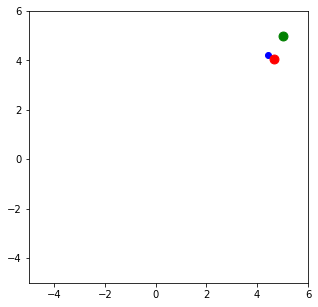

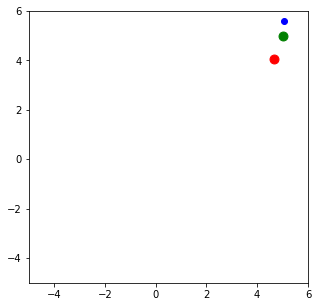

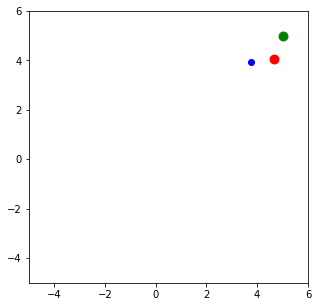

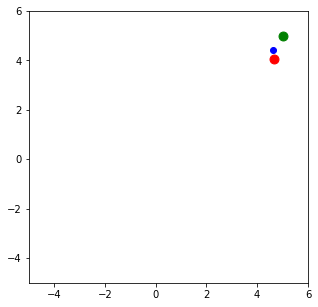

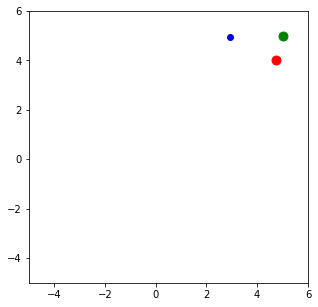

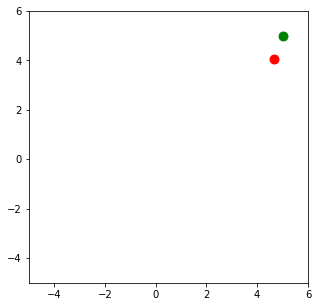

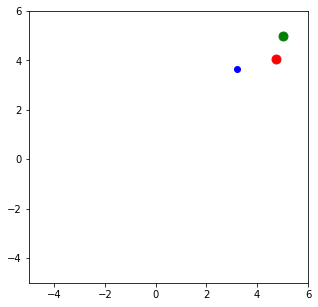

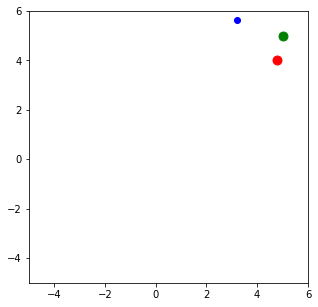

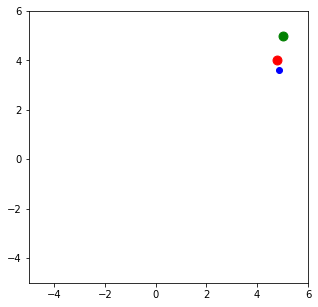

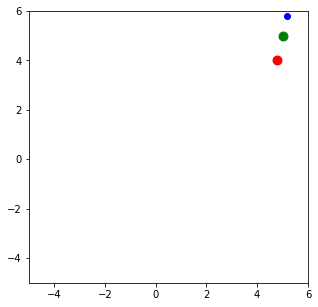

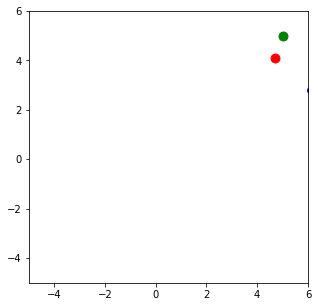

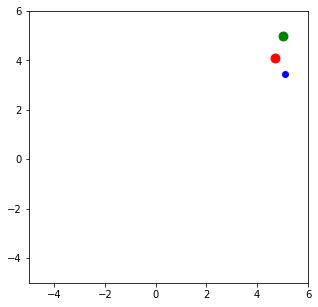

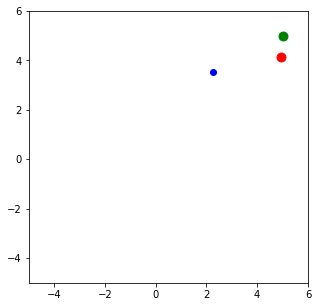

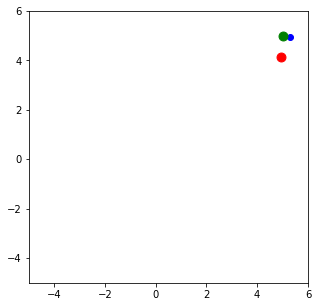

In [34]:
## unstable learning rate
print('Unstable------------')
train(mu, target, loss, lr=0.1, n_train=1, n_test=100, n_iter=100)
print()

## stable learning rate
print('Stable-----------')
train(mu, target, loss, lr=0.01, n_train=1, n_test=100, n_iter=100, viz=True)

Increasing `n_train` improve the stability of the training. Now `lr = 0.1` and greater still works well.
We can learn much faster due to larger learning rate.

This is because the gradient signal given by `1` training datapoint is too noisy/wrong.
If we sample a datapoint closer to `target` then we end up pushing `mu` away from `target`.

Increasing `n_train` lowers the variance of the gradient, making the training more stable.
However, this solution quickly become intractable for high dimensional distributions.
The number of samples needed to reliably estimate $\mathbb{E}_{q_\phi (x)}[f(x)]$ grows
exponentially with the number of dimensions of $q_\phi$.

0 40.18998680903255
1 19.354499030101007
2 14.5610622836579
3 11.195591729138606
4 7.949798103956357
5 5.958264501268189
6 4.682275893066065
7 4.182704233016582
8 3.581987867325464
9 2.596331817039846
10 2.7484520797043923
11 2.318207528391386
12 2.167169778933071
13 2.147188982859877
14 1.9577248595923695
15 2.24113888524932
16 2.140828043010227
17 2.243421643393482
18 2.282173729178083
19 1.8357279681931957
20 2.0634145968328252
21 2.1010690871862248
22 2.0079612059556813
23 2.104897877597802
24 2.142935379740766
25 1.6277130637955586
26 2.2005198120504645
27 1.995096457479111
28 1.6896774420275533
29 1.9980025051378971
30 1.9457466577746316
31 1.9440664376993175
32 2.008420343139997
33 1.8747219255872394
34 1.9625601085179891
35 2.3169690055846304
36 2.15507421394815
37 2.037896073770961
38 1.8940099888615562
39 2.3612926885107623
40 2.0860867183250376
41 2.392940798267293
42 2.0111240154059016
43 2.2288871333062343
44 2.1036063638058757
45 2.1238335839184743
46 2.0311773994350255
4

<ipython-input-33-247436d360eb>:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=(5, 5))


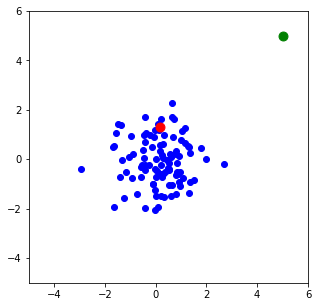

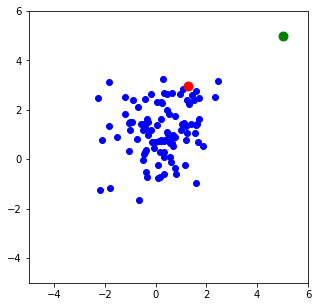

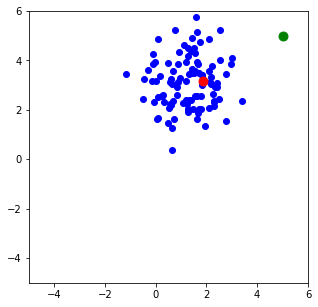

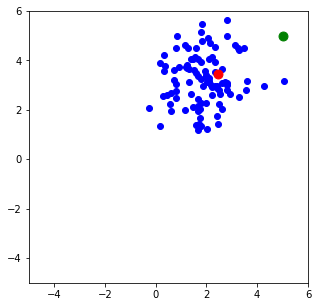

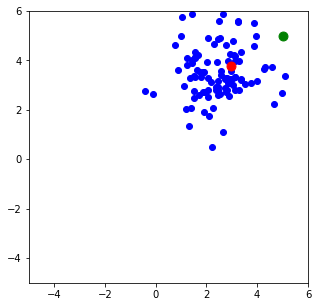

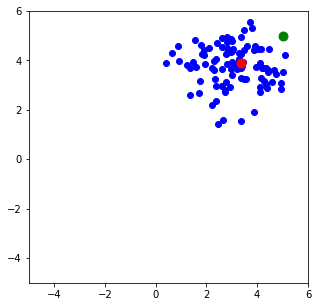

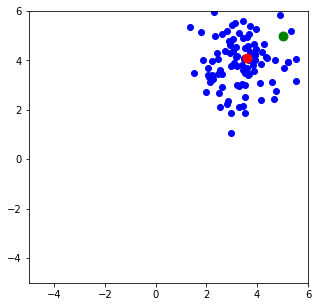

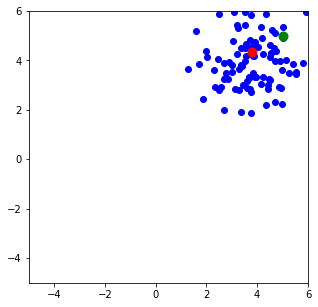

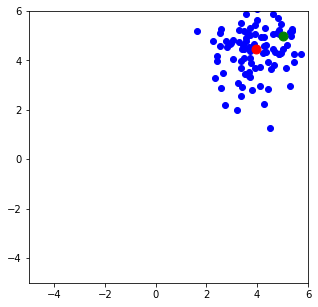

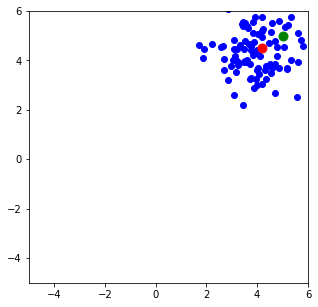

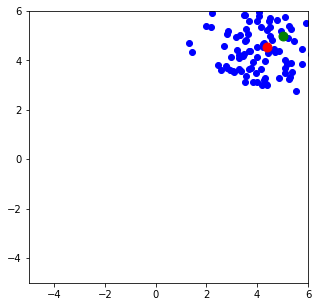

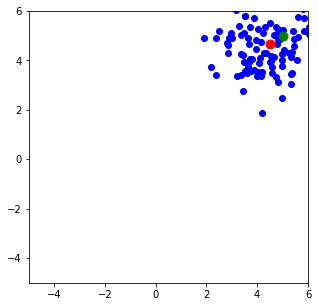

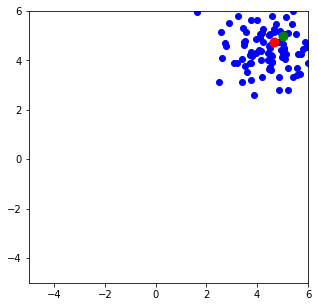

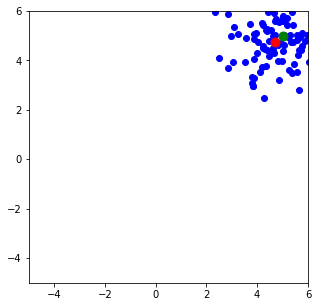

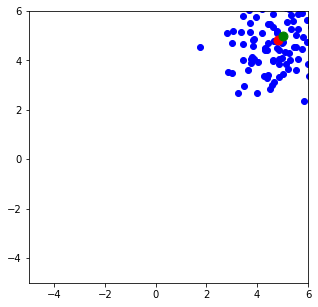

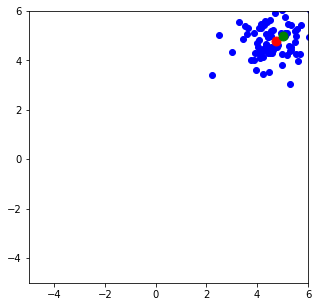

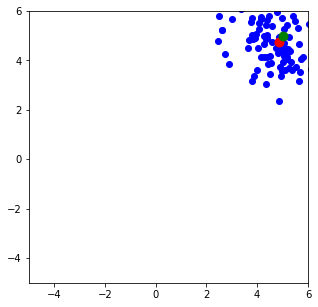

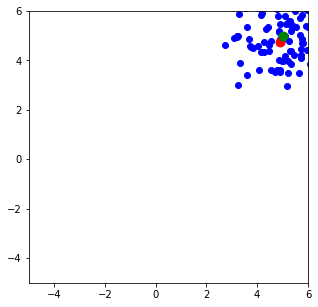

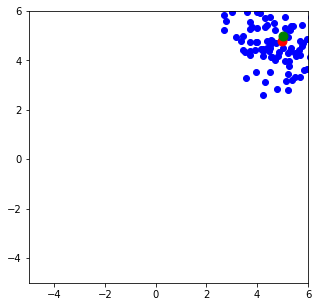

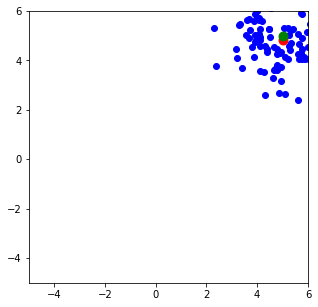

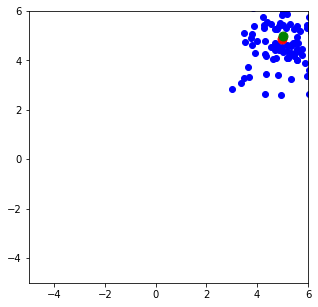

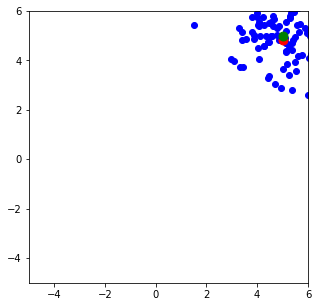

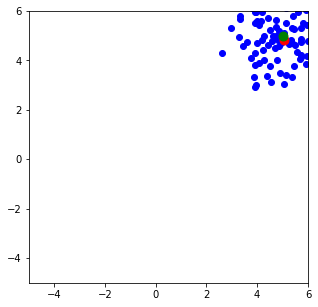

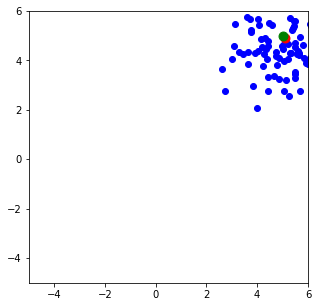

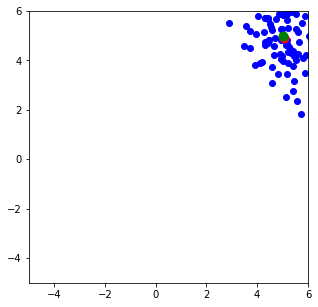

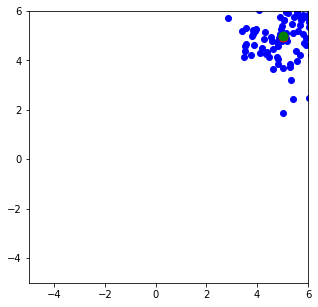

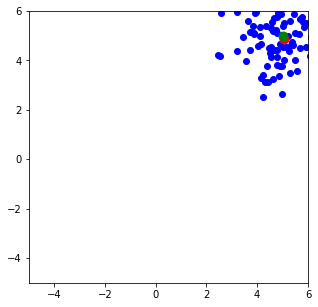

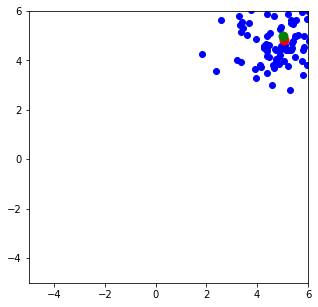

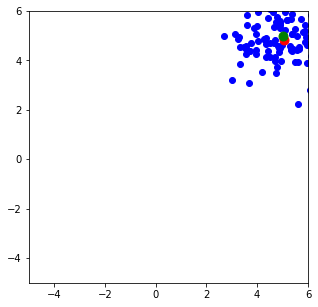

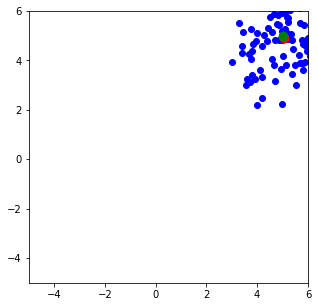

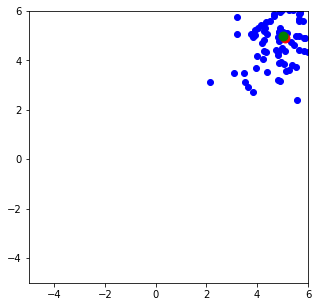

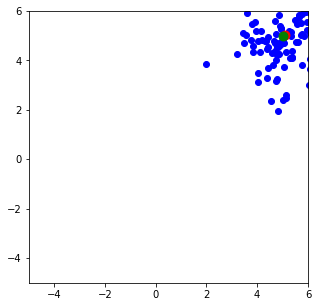

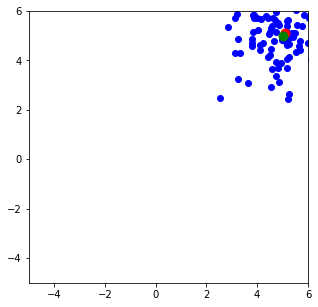

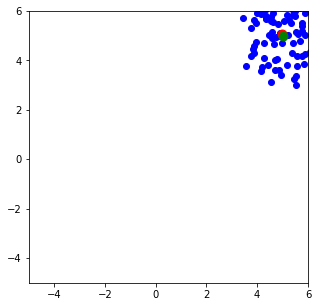

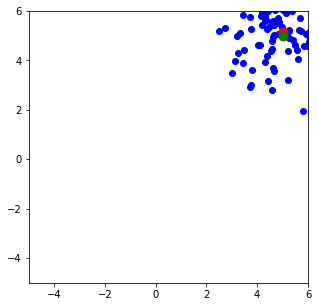

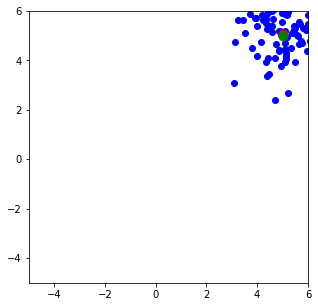

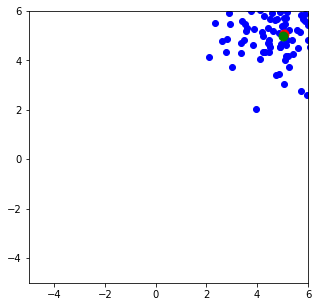

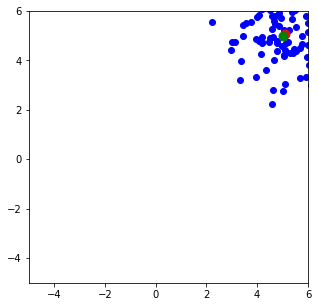

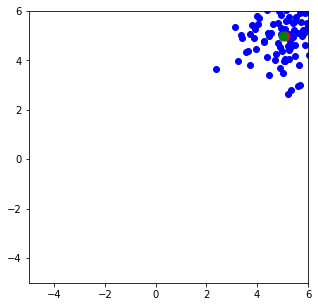

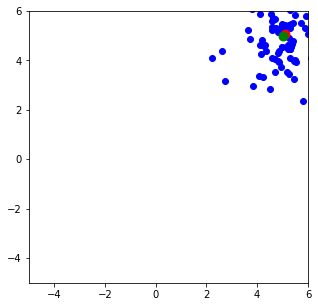

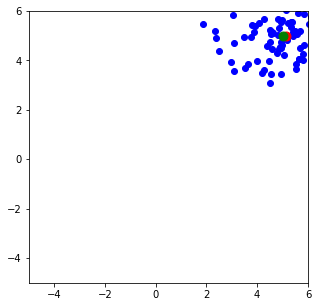

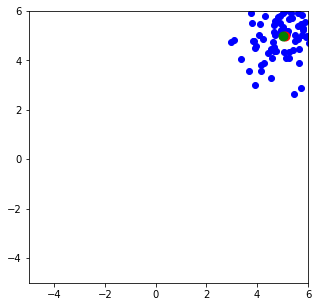

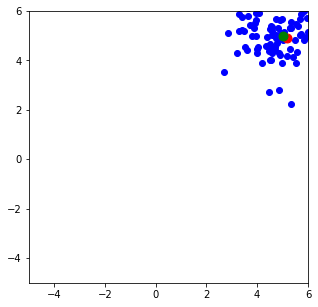

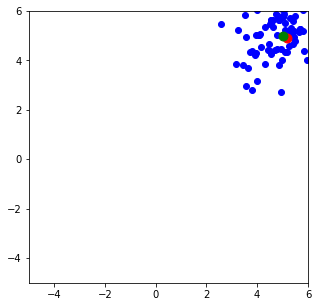

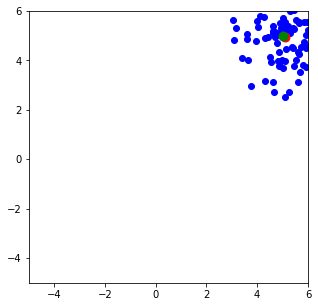

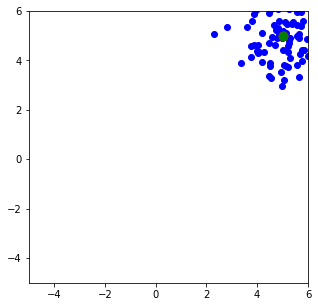

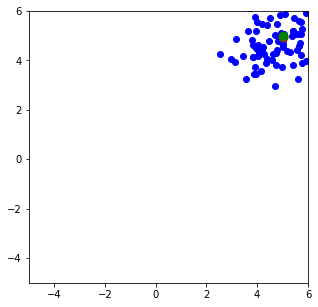

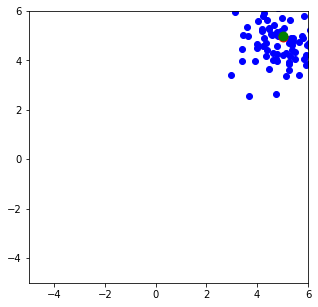

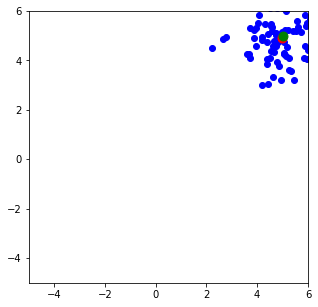

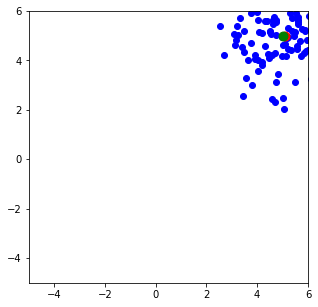

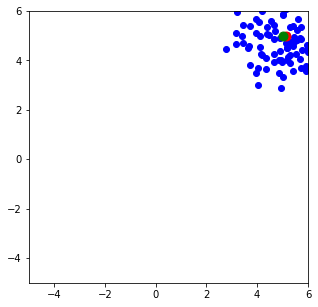

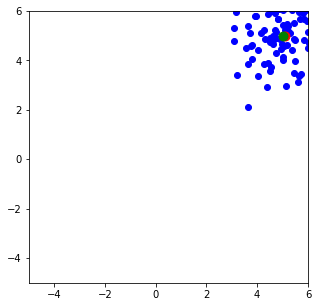

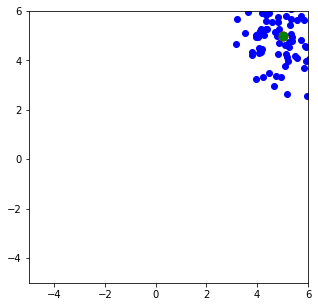

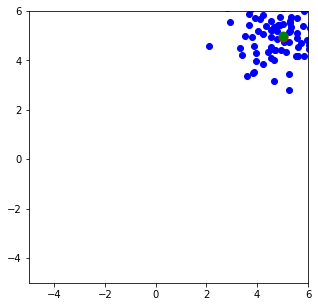

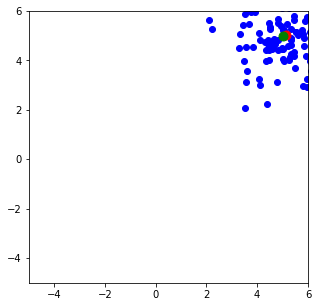

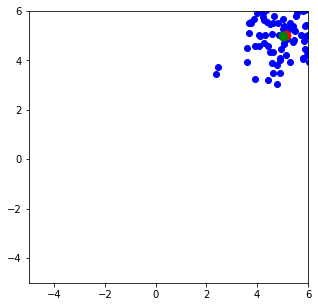

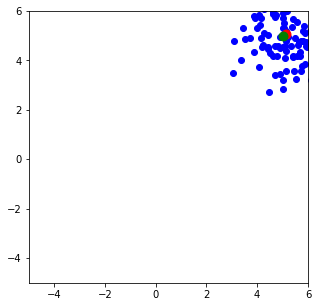

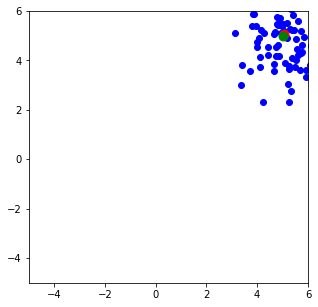

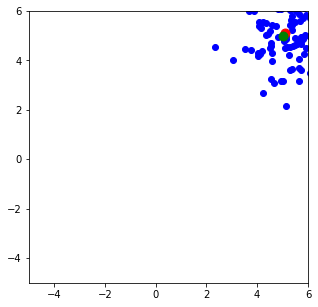

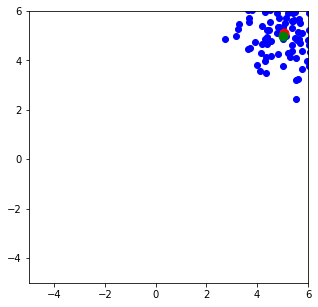

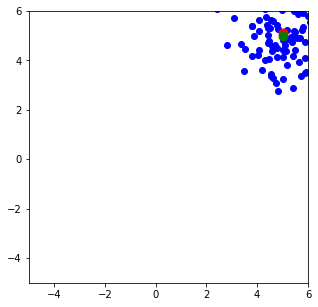

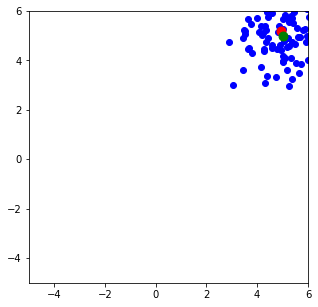

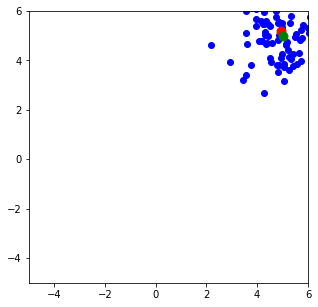

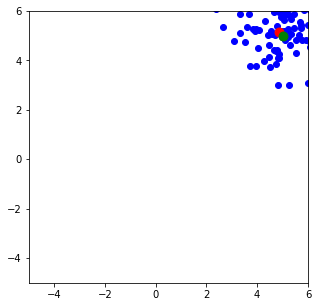

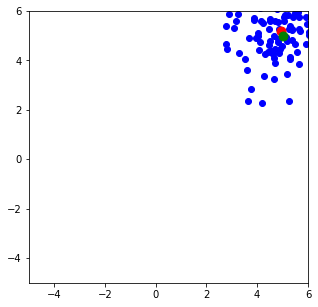

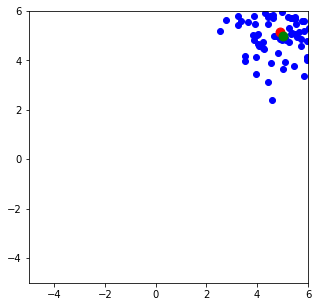

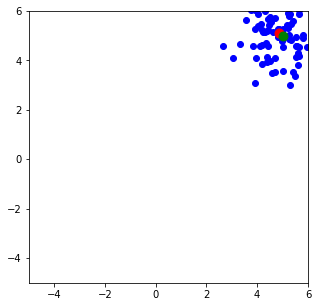

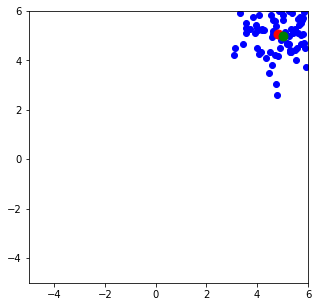

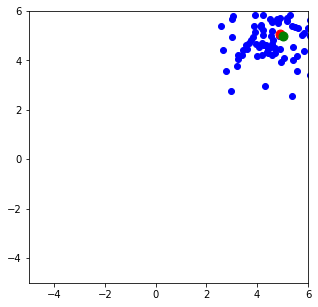

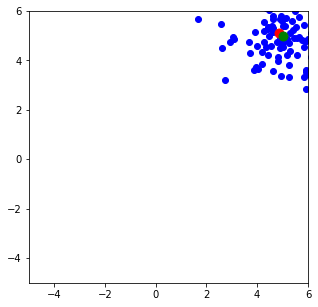

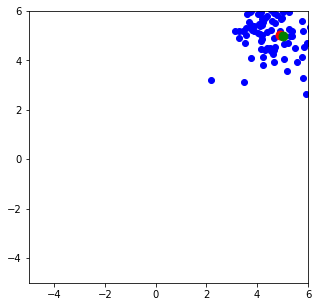

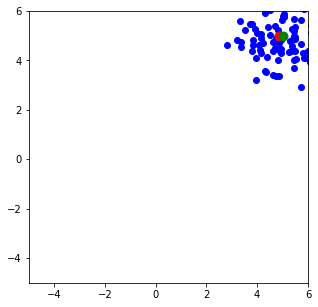

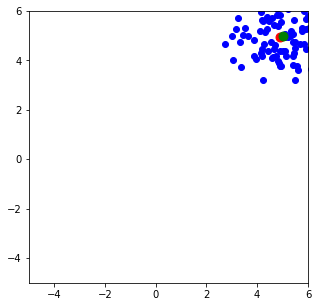

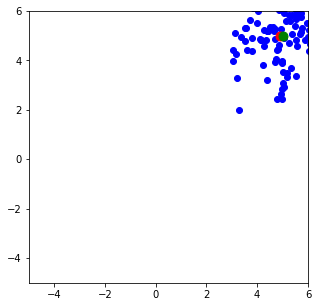

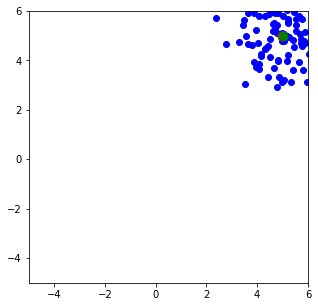

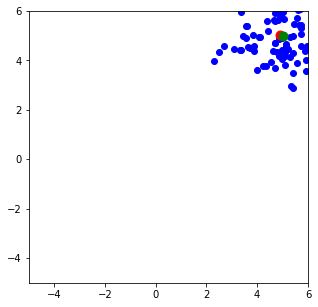

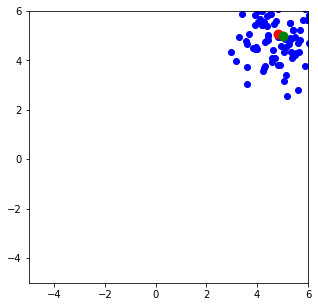

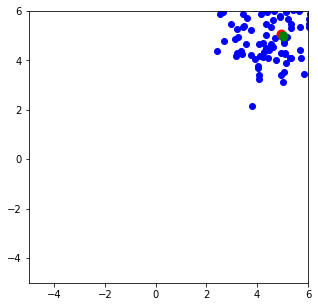

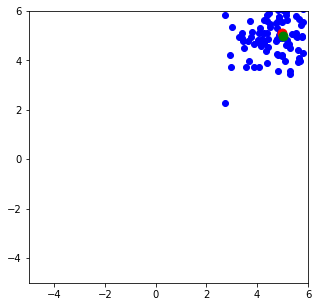

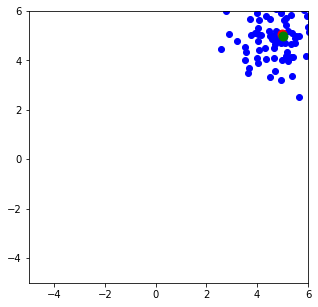

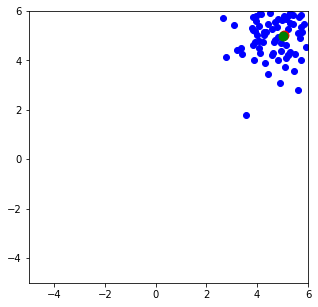

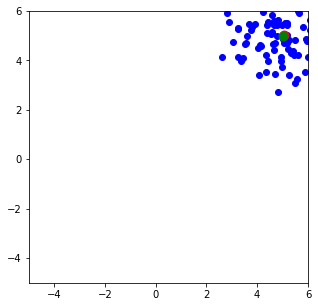

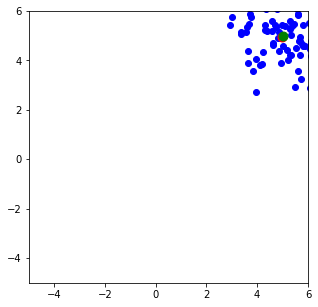

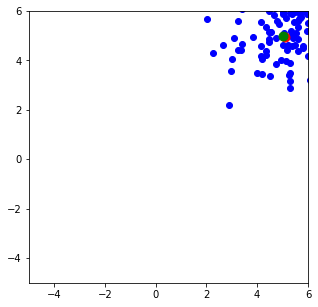

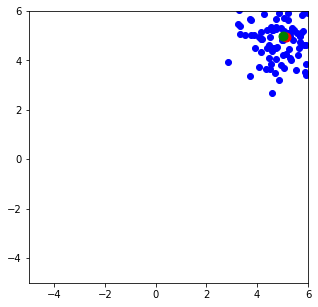

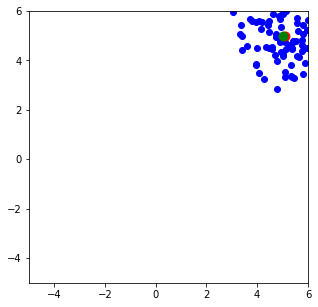

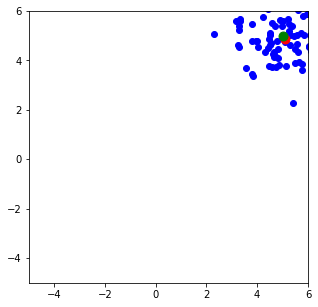

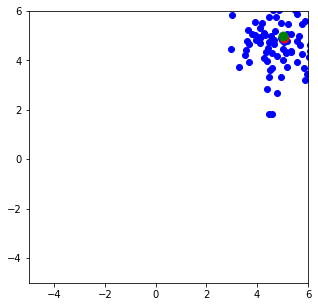

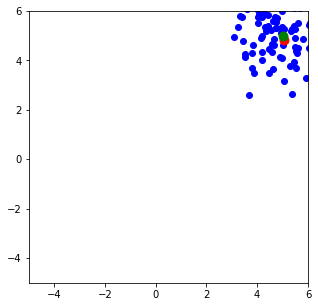

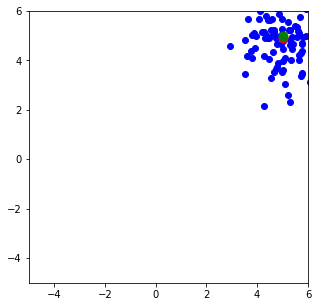

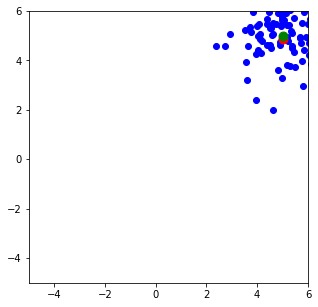

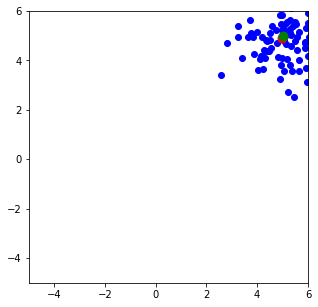

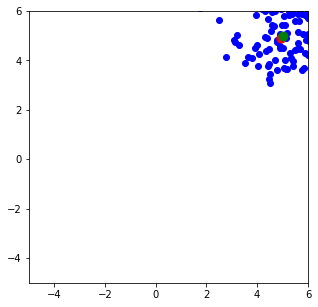

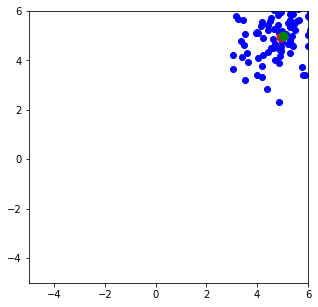

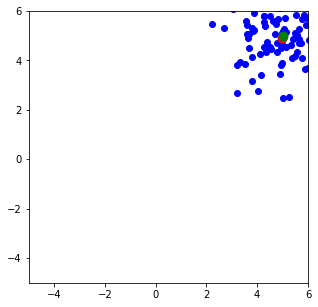

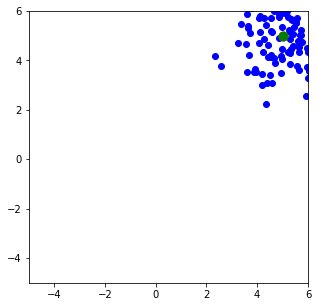

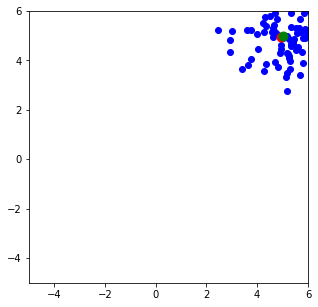

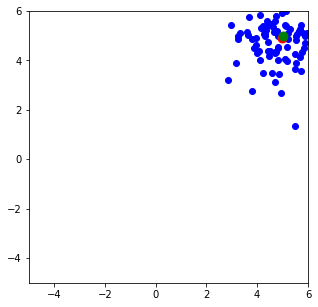

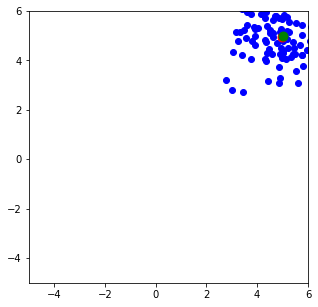

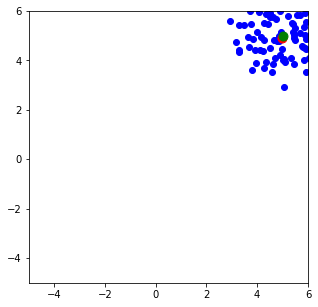

In [35]:
# train(mu, target, loss, lr=0.01, n_train=10, n_test=100, n_iter=100)

train(mu, target, loss, lr=0.1, n_train=100, n_test=100, n_iter=100, viz=True)